In [1]:
import zntrack
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
dft = [
    zntrack.from_rev("locality_H_CP2KSinglePoint_1"),
    zntrack.from_rev("locality_H_CP2KSinglePoint_2"),
    zntrack.from_rev("locality_H_CP2KSinglePoint_3"),
    zntrack.from_rev("locality_H_CP2KSinglePoint_4"),
    zntrack.from_rev("locality_H_CP2KSinglePoint_5"),
]

2023-08-05 15:28:56,191 (DEBUG): Welcome to IPS - the Interatomic Potential Suite!


In [3]:
def _compute_std_leave_one_out(data):  # Leave-One-Out Cross-Validation
    std = [
        np.std([val for k, val in enumerate(data) if k != idx])
        for idx in range(len(data))
    ]
    return np.std(data), scipy.stats.sem(std)

In [8]:
stds = []

for n in dft:
    forces = np.array([x.get_forces() for x in n.atoms])
    stds.append(_compute_std_leave_one_out(np.linalg.norm(forces[:, 0], axis=1)))
    # stds.append(_compute_std_leave_one_out(forces[:, 0, 0]))

stds = np.array(stds)

Text(0.5, 0, 'Distance $r ~ / ~ \\AA$')

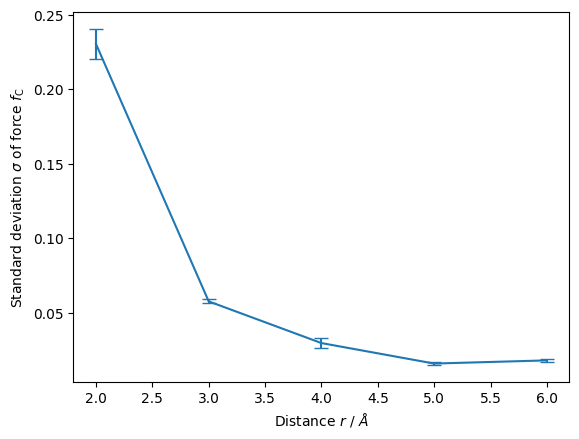

In [9]:
fig, ax = plt.subplots()
ax.errorbar(x=list(range(2, len(stds)+2)), y=stds[:, 0], yerr=stds[:, 1], capsize=5)
ax.set_ylabel(rf"Standard deviation $\sigma$ of force $f_\mathrm{{{'C'}}}$")
ax.set_xlabel(r"Distance $r ~ / ~ \AA$")